Load required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

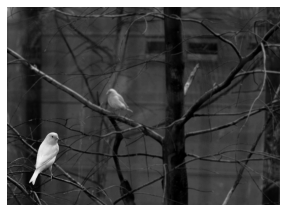

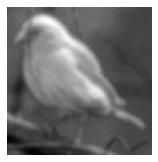

In [2]:
I_bird1 = cv2.imread('birds1.jpeg',0)/255
I_template = cv2.imread('template.jpeg',0)/255

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.axis('off')
plt.imshow(I_bird1, cmap='gray')

plt.figure(figsize=(6,6))
plt.subplot(2,1,2)
plt.axis('off')
plt.imshow(I_template, cmap='gray')

Function to perform cross correlation filter

In [3]:
def crossCorrelelationFilter(I, template):
    '''
    This function implements cross correlation filter
    '''
    I_crosscor = cv2.filter2D(I, ddepth=-1, kernel= template)
    idx = np.unravel_index(np.argmax(I_crosscor),I_crosscor.shape)

    w = template.shape[1]
    h = template.shape[0]
    cv2.rectangle(I, (idx[1]-int(w/2), idx[0]-int(h/2)), (idx[1]+int(w/2), idx[0] + int(h/2)), (1,0,0), 2)
    
    return I_crosscor, I

Apply cross - correlation on birds1.jpeg using template

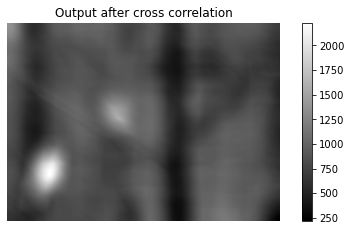

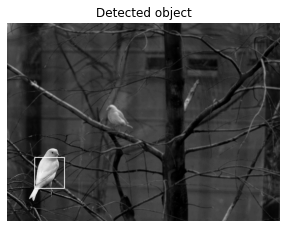

In [4]:
template = I_template
I_crosscor, I_detected = crossCorrelelationFilter(np.copy(I_bird1), template)
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.axis('off')
plt.title('Output after cross correlation')
im = plt.imshow(I_crosscor, cmap='gray')
plt.colorbar(im)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.axis('off')
plt.title('Detected object')
plt.imshow(I_detected, cmap = 'gray')

Function to perform normalized cross correlation

In [5]:
def norCrossCor(I, template):
    '''
    Function implements normalized cross-correlation fiter
    '''
    # pad image
    m = int(template.shape[0]/2)
    n = int(template.shape[1]/2)
    I_pad = np.pad(I, ((m,m),(n,n)))
    
    # loop over image
    I_norcorr = np.zeros_like(I)
    template_pix_sum = np.sum(template)
    template = np.flip(np.flip(template,1),0)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            # Extract window
            I_window = I_pad[i:i+I_template.shape[0],j:j+I_template.shape[1]]
            window_pix_sum = np.sum(I_window)

            # Normalized cross correlation value
            A = I_window - window_pix_sum
            B = template - template_pix_sum

            N = np.sum(np.multiply(A,B))
            D = np.sqrt(np.multiply(np.sum(np.square(A)),np.sum(np.square(B))))
            I_norcorr[i,j] = N/D
            
    # Detect maxima
    idx = np.unravel_index(np.argmax(I_norcorr),I_norcorr.shape)                
    w = template.shape[1]
    h = template.shape[0]
    I_detected = np.copy(I)
    # Annotate rectangle on detected object
    cv2.rectangle(I_detected, (idx[1]-int(w/2), idx[0]-int(h/2)), (idx[1]+int(w/2), idx[0] + int(h/2)), (1,0,0), 2)
            
    return I_detected, I_norcorr

Normalized cross correlation on birds1.jpeg

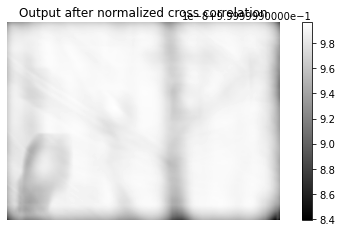

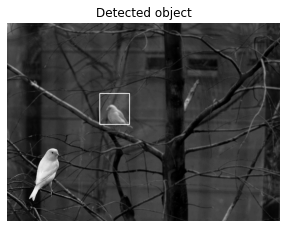

In [6]:
I_detected, I_norcorr = norCrossCor(I_bird1, I_template)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.axis('off')
im = plt.imshow(I_norcorr, cmap='gray')
plt.title('Output after normalized cross correlation')
plt.colorbar(im)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.axis('off')
plt.title('Detected object')
plt.imshow(I_detected, cmap = 'gray')

Normalized cross correlation on birds2.jpeg

In [7]:
I_bird2 = cv2.imread('birds2.jpeg',0)/255
I_detected, I_norcorr = norCrossCor(I_bird2, I_template)

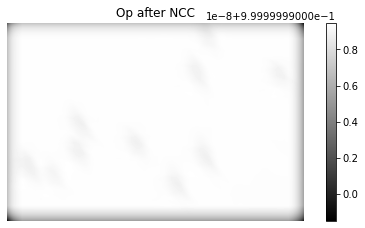

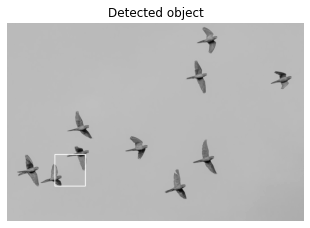

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.axis('off')
im = plt.imshow(I_norcorr, cmap='gray')
plt.title('Op after NCC')
plt.colorbar(im)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.axis('off')
plt.title('Detected object')
plt.imshow(I_detected, cmap = 'gray')